In [245]:
%pip install pandas numpy seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [246]:
import pandas as pd
import numpy as np
import seaborn as sns

In [247]:
print('Lib versions:')
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Seaborn: {sns.__version__}')
print('\nPython version:')
!python3.12 --version

Lib versions:
Pandas: 2.2.3
Numpy: 2.1.1
Seaborn: 0.13.2

Python version:
Python 3.12.6


In [248]:
!wget -P data https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-10-07 16:46:00--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘data/laptops.csv.1’

laptops.csv.1       100%[===================>] 291.58K  --.-KB/s    in 0.06s   

2024-10-07 16:46:00 (4.39 MB/s) - ‘data/laptops.csv.1’ saved [298573/298573]



# Loading and preparing the dataset

In [249]:
df = pd.read_csv('./data/laptops.csv')
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [250]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

The homework requested to use only the columns `'ram', 'storage', 'screen' and 'final_price'`.

In [251]:
df = df[['ram', 'storage', 'screen', 'final_price']]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


### EDA - Look at the final_price variable. Does it have a long tail?

> Long tail meaning (in retail and marketing):\
> used to refer to the large number of products that sell in small quantities, as contrasted with the small number of best-selling products.\
> - By [Oxford Languages](https://languages.oup.com/google-dictionary-en)

Like in the image from [the lesson video](https://youtu.be/k6k8sQ0GhPM?si=4m0tbdLMlUBXfxGg&t=494).

<Axes: xlabel='final_price', ylabel='Count'>

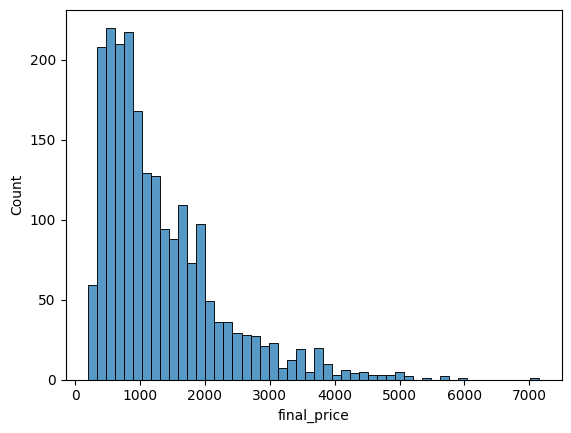

In [252]:
sns.histplot(df['final_price'], bins=50)

So, yes, the `final_price` has a long tail

### Q1. Missing Values

There's one column with missing values. What is it?

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB


In [254]:
null_cols = df.columns[df.isnull().any()].tolist()
print(f'Null columns: {null_cols}')

Null columns: ['screen']


### Q2. Median for RAM


In [255]:
df['ram'].median()

np.float64(16.0)

### Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [256]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test # we subtract to avoid integer errors (aka len n != len train + test + val)

n, n_val, n_test, n_train, n_val + n_test + n_train

(2160, 432, 432, 1296, 2160)

In [257]:
idx = np.arange(n)
print(idx)

np.random.seed(42)
np.random.shuffle(idx)
print(idx)

[   0    1    2 ... 2157 2158 2159]
[2079  668 2073 ... 1130 1294  860]


In [258]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [259]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Maybe we need to apply log1p to `final_price`, because of the long tail. The questions do not ask for this

In [260]:
# we use log to improve ML models performance
# log1p = log of num + 1, because log of 0 causes error
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

### Q3. Filling NAs

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [278]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return round(np.sqrt(mse), 2)

In [261]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

#### Trying with nan to 0

In [263]:
print(df_train.screen.isna().sum())
print(df_val.screen.isna().sum())
print(df_test.screen.isna().sum())

3
1
0


In [264]:
def prepare_X(df: pd.DataFrame, fill_with):
    X = df.fillna(fill_with).values
    return X

In [227]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [273]:
X_train_zeros = prepare_X(df=df_train, fill_with=0)
X_val_zeros = prepare_X(df=df_val, fill_with=0)

### Q1. Missing Values

There's one column with missing values. What is it?

In [274]:
w0, w = train_linear_regression(X=X_train_zeros, y=y_train)
w0, w

(np.float64(6.7271637061124565),
 array([ 0.02630589,  0.00066041, -0.03651909]))

In [275]:
y_pred = w0 + X_val_zeros.dot(w)

<Axes: ylabel='Count'>

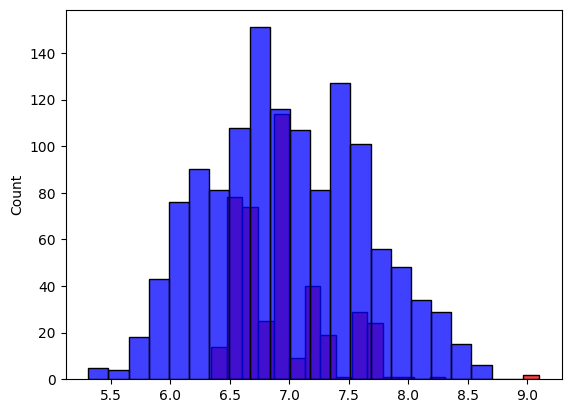

In [276]:
sns.histplot(y_pred, color='red')
sns.histplot(y_train, color='blue')

In [277]:
rmse(y_val, y_pred)

np.float64(0.43)

#### Testing

### Q4. Missing values

How many columns in the dataset have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [8]:
(df.isna().sum() > 0).sum()

np.int64(3)

### Q5. Maximum final price

What's the maximum final price of Dell notebooks in the dataset?

In [9]:
df[df.Brand == 'Dell']['Final Price'].max()

np.float64(3936.0)

### Q6. Median value of Screen

1. Find the median value of `Screen` column in the dataset.
2. Next, calculate the most frequent value of the same `Screen` column.
3. Use `fillna` method to fill the missing values in `Screen` column with the most frequent value from the previous step.
4. Now, calculate the median value of `Screen` once again.

Has it changed?

In [10]:
df['Screen'].describe()

count    2156.000000
mean       15.168112
std         1.203329
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.000000
Name: Screen, dtype: float64

In [11]:
first_mean = df['Screen'].mean()
first_mean

np.float64(15.168112244897959)

In [12]:
df['Screen'].mode()

0    15.6
Name: Screen, dtype: float64

In [13]:
df['Screen'].fillna(df['Screen'].mode())

0       15.6
1       15.6
2       15.6
3       15.6
4       15.6
        ... 
2155    17.3
2156    17.3
2157    17.3
2158    13.4
2159    13.4
Name: Screen, Length: 2160, dtype: float64

In [14]:
last_mean = df['Screen'].mean()
first_mean == last_mean

np.True_

### Q7. Sum of weights

1. Select all the "Innjoo" laptops from the dataset.
2. Select only columns RAM, Storage, Screen.
3. Get the underlying NumPy array. Let's call it X.
4. Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX.
5. Compute the inverse of XTX.
6. Create an array y with values [1100, 1300, 800, 900, 1000, 1100].
7. Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.
8. What's the sum of all the elements of the result?

> Note: You just implemented linear regression. We'll talk about it in the next lesson.

In [15]:
X = df[df.Brand == "Innjoo"][['RAM', 'Storage', 'Screen']].values
X

array([[  8. , 256. ,  15.6],
       [  8. , 512. ,  15.6],
       [  4. ,  64. ,  14.1],
       [  6. ,  64. ,  14.1],
       [  6. , 128. ,  14.1],
       [  6. , 128. ,  14.1]])

In [16]:
XTX = X.T @ X
XTX

array([[2.52000e+02, 8.32000e+03, 5.59800e+02],
       [8.32000e+03, 3.68640e+05, 1.73952e+04],
       [5.59800e+02, 1.73952e+04, 1.28196e+03]])

In [17]:
inverted_XTX = np.linalg.inv(XTX)
inverted_XTX

array([[ 2.78025381e-01, -1.51791334e-03, -1.00809855e-01],
       [-1.51791334e-03,  1.58286725e-05,  4.48052175e-04],
       [-1.00809855e-01,  4.48052175e-04,  3.87214888e-02]])

In [18]:
y = np.array([1100, 1300, 800, 900, 1000, 1100])
y

array([1100, 1300,  800,  900, 1000, 1100])

In [19]:
w = (inverted_XTX @ X.T) * y
w

array([[ 289.28183831, -163.28302487, -325.17111146,  134.62818528,
          52.44041848,   57.68446033],
       [  -1.21170793,    3.83576374,    1.00713386,   -1.59921842,
          -0.76387432,   -0.84026175],
       [ -96.49448601,   35.07282588,  137.12712814,  -27.18972029,
          -1.53546111,   -1.68900722]])

In [20]:
np.sum(w)

np.float64(91.29988062995548)